In [1]:
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 22.4 MB/s 
     |████████████████████████████████| 9.8 MB 33.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=fa8402f87f44d22c2f667c4098195891a6bf8e656e2b9bd3ec326929c7f5cfba
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=8d0244648d34cf0bdf8de9467c69f03c53cd0d5ca962ac274ff0d1d1b1ed95e6
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import math
import scipy
import pingouin as pg
import scikit_posthocs as sp

from google.colab import files

from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [5]:
LevodopaChallengeWide = pd.read_csv('LevodopaChallengeWide.csv', sep = ';')


In [6]:
LevodopaChallengeWide


,patient,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,A1,0.611469,114.268519,0.523822,0.302693,1.042680,0.650821,0.124466,0.731670,0.311011,...,0.059352,0.286876,0.043708,0.106911,0.056958,0.019985,0.000773,0.440509,0.017174,0.034967
1,B2,0.518247,92.621999,0.616190,0.365236,1.298505,0.757749,0.192545,0.939427,0.359078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C3,0.717643,120.639756,0.508088,0.337158,0.989035,0.726702,0.136771,0.662393,0.326642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D4,0.706150,103.419973,0.557258,0.367137,1.160833,0.842990,0.184698,0.766362,0.394471,...,0.041001,0.240066,0.163996,0.175425,0.218589,0.133066,0.020699,0.257111,0.075236,0.146961
4,E5,0.502049,87.989886,0.540385,0.280149,1.236000,0.588038,0.164062,0.866156,0.369844,...,0.034107,0.354927,0.051930,0.249345,0.265119,0.036985,0.010152,0.283840,0.045063,0.082108
5,F6,0.967739,123.837209,0.474306,0.480193,0.966250,1.019113,0.117861,0.665518,0.300732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,G7,0.442184,98.831386,0.609459,0.266526,1.229825,0.630156,0.119232,0.866156,0.371236,...,0.048612,0.197462,0.017677,0.138115,0.075831,0.018236,0.028362,0.231541,0.021156,0.046823
7,H8,0.748788,114.186851,0.525962,0.356121,1.052660,0.842926,0.146917,0.665518,0.350597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I9,0.578984,109.505703,0.551923,0.295549,1.086364,0.633942,0.219333,0.742149,0.344215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,J10,0.478769,142.934004,0.412377,0.197330,0.845076,0.403777,0.148787,0.607867,0.237209,...,0.103208,0.384080,0.086576,0.090531,0.140019,0.028377,0.030936,0.145172,0.006111,0.010813


In [7]:
LevodopaChallengeWide.dtypes


patient     object
1          float64
2          float64
3          float64
4          float64
            ...   
276        float64
277        float64
278        float64
279        float64
280        float64
Length: 281, dtype: object

In [8]:
LevodopaChallengeWide.isnull().sum()

patient    0
1          0
2          0
3          0
4          0
          ..
276        8
277        8
278        8
279        8
280        8
Length: 281, dtype: int64

In [9]:
LevodopaChallengeWide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Columns: 281 entries, patient to 280
dtypes: float64(280), object(1)
memory usage: 37.4+ KB


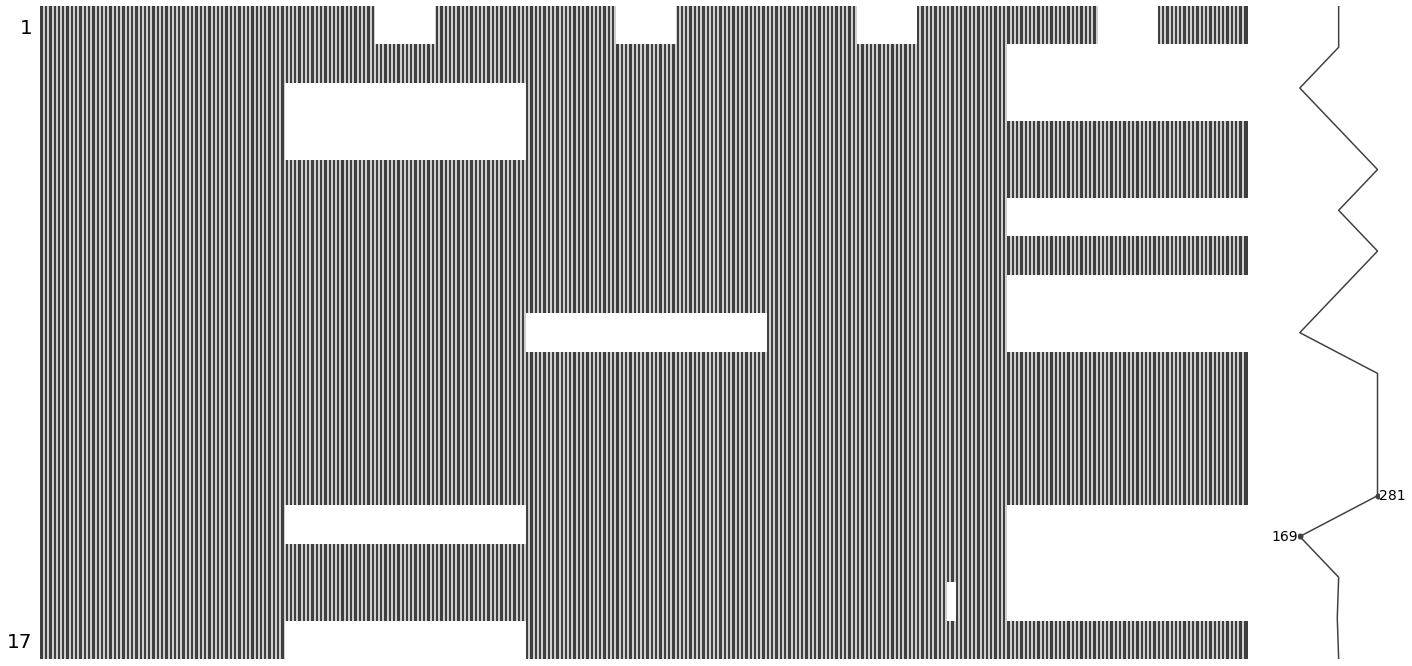

In [12]:
mno.matrix(LevodopaChallengeWide,figsize = (24,12))

In [13]:
# Remove patient index

patid_LevodopaChallengeWide = LevodopaChallengeWide.iloc[:,0:1]

In [14]:
# Select remianing, numeric variables

LevodopaChallengeWide = LevodopaChallengeWide.iloc[:,1:282]

In [15]:
LevodopaChallengeWide


,1,2,3,4,5,6,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
0,0.611469,114.268519,0.523822,0.302693,1.042680,0.650821,0.124466,0.731670,0.311011,0.399191,...,0.059352,0.286876,0.043708,0.106911,0.056958,0.019985,0.000773,0.440509,0.017174,0.034967
1,0.518247,92.621999,0.616190,0.365236,1.298505,0.757749,0.192545,0.939427,0.359078,0.515325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.717643,120.639756,0.508088,0.337158,0.989035,0.726702,0.136771,0.662393,0.326642,0.349257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.706150,103.419973,0.557258,0.367137,1.160833,0.842990,0.184698,0.766362,0.394471,0.392701,...,0.041001,0.240066,0.163996,0.175425,0.218589,0.133066,0.020699,0.257111,0.075236,0.146961
4,0.502049,87.989886,0.540385,0.280149,1.236000,0.588038,0.164062,0.866156,0.369844,0.432020,...,0.034107,0.354927,0.051930,0.249345,0.265119,0.036985,0.010152,0.283840,0.045063,0.082108
5,0.967739,123.837209,0.474306,0.480193,0.966250,1.019113,0.117861,0.665518,0.300732,0.313802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.442184,98.831386,0.609459,0.266526,1.229825,0.630156,0.119232,0.866156,0.371236,0.492077,...,0.048612,0.197462,0.017677,0.138115,0.075831,0.018236,0.028362,0.231541,0.021156,0.046823
7,0.748788,114.186851,0.525962,0.356121,1.052660,0.842926,0.146917,0.665518,0.350597,0.345047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.578984,109.505703,0.551923,0.295549,1.086364,0.633942,0.219333,0.742149,0.344215,0.402816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.478769,142.934004,0.412377,0.197330,0.845076,0.403777,0.148787,0.607867,0.237209,0.343252,...,0.103208,0.384080,0.086576,0.090531,0.140019,0.028377,0.030936,0.145172,0.006111,0.010813


In [18]:
missing_columns = list(LevodopaChallengeWide)
missing_columns

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '13

In [19]:
# Input random numbers on the missing spaces

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [20]:
# Rename new variables
for feature in missing_columns:
    LevodopaChallengeWide[feature + '_imp'] = LevodopaChallengeWide[feature]
    LevodopaChallengeWide = random_imputation(LevodopaChallengeWide, feature)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# Estimate the missing data using a regression modl

# Input estimates only (!) on the rows/colunms where the original data was missing (i.e. substitute the random numbers introduced above)

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = LevodopaChallengeWide[feature + "_imp"]
    parameters = list(set(LevodopaChallengeWide.columns) - set(missing_columns) - {feature + '_imp'})
    

    model = linear_model.LinearRegression()
    model.fit(X = LevodopaChallengeWide[parameters], y = LevodopaChallengeWide[feature + '_imp'])
    
    deter_data.loc[LevodopaChallengeWide[feature].isnull(), "Det" + feature] = model.predict(LevodopaChallengeWide[parameters])[LevodopaChallengeWide[feature].isnull()]


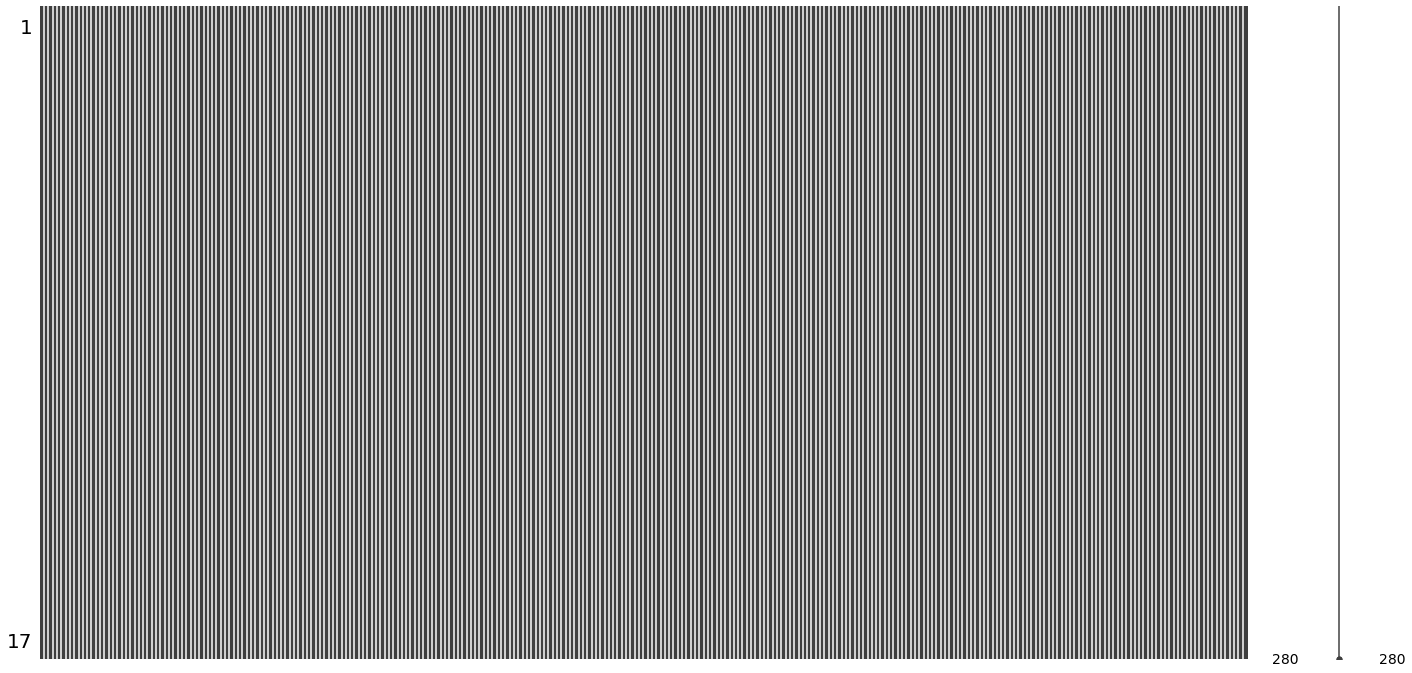

In [22]:
mno.matrix(deter_data, figsize = (24,12))


In [ ]:
deter_data.to_csv('output_wide.csv', encoding = 'utf-8-sig') 
files.download('output_wide.csv')

In [23]:
output_wide = pd.read_csv('output_wide.csv', sep = ';')

In [24]:
list(output_wide)

['patient',
 'Speed (m/s)',
 'Cadence (steps/min)',
 'Step Time - worst side (s)2',
 'Step Length - worst side (m)2',
 'Stride Time (s)',
 'Stride Length (m)',
 'Step Width (m)',
 'Stance Time - worst time t (s)2',
 'Swing Time - worst side (s)2',
 'Double Support Time (s)',
 'Single Support Time - worst side',
 'hip_flexion_rom_worstside',
 'hip_adduction_rom_worstside',
 'hip_rotation_rom_worstside',
 'knee_angle_rom_worstside',
 'ankle_angle_rom_worstside',
 'hip_flexion_mean_vel_worstside',
 'hip_adduction_mean_vel_worstside',
 'hip_rotation_mean_vel_worstside',
 'knee_angle_r_mean_vel_worstside',
 'ankle_angle_mean_vel_worstside',
 'arm_flex_rom_worstside',
 'arm_add_rom_worstside',
 'elbow_flex_rom_worstside',
 'arm_rot_rom_worstside',
 'pro_sup_rom_worstside',
 'wrist_flex_rom_worstside',
 'wrist_dev_rom_worstside',
 'arm_flex_mean_vel_worstside',
 'arm_add_mean_vel_worstside',
 'arm_rot_mean_vel_worstside',
 'elbow_flex_mean_vel_worstside',
 'pro_sup_mean_vel_worstside',
 'wris

In [25]:
output_wide

,patient,Speed (m/s),Cadence (steps/min),Step Time - worst side (s)2,Step Length - worst side (m)2,Stride Time (s),Stride Length (m),Step Width (m),Stance Time - worst time t (s)2,Swing Time - worst side (s)2,...,Cv Step Width,CV Stride Time,Cv Stride Lenght,CV Double Support,CV Stance Fraction,Step Time Asymetry N,Step lenght AsymetryN,Stance Time Asymetry N,Swing Time Asymetry N,Group
0,A1,0.611469,114.268519,0.523822,0.302693,1.042680,0.650821,0.124466,0.731670,0.311011,...,0.173002,0.034927,0.133088,0.064845,0.025515,0.005713,0.106101,0.023141,0.052408,OFF
1,B2,0.518247,92.621999,0.616190,0.365236,1.298505,0.757749,0.192545,0.939427,0.359078,...,0.443050,0.076291,0.309330,0.162151,0.051773,0.107760,0.252853,0.081588,0.186011,OFF
2,C3,0.717643,120.639756,0.508088,0.337158,0.989035,0.726702,0.136771,0.662393,0.326642,...,0.403884,0.102456,0.226720,0.177430,0.031323,0.044568,0.063652,0.021642,0.045373,OFF
3,D4,0.706150,103.419973,0.557258,0.367137,1.160833,0.842990,0.184698,0.766362,0.394471,...,0.329662,0.024560,0.127313,0.105754,0.016734,0.077761,0.209073,0.029428,0.059760,OFF
4,E5,0.502049,87.989886,0.540385,0.280149,1.236000,0.588038,0.164062,0.866156,0.369844,...,0.181974,0.406887,0.095313,0.106603,0.027155,0.383606,0.047893,0.185206,0.331235,OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,M13,0.675777,105.494506,0.601471,0.399731,1.137766,0.800632,0.325380,0.747505,0.390261,...,0.261770,0.083390,0.275369,0.211724,0.053054,0.112768,0.104086,0.051326,0.106259,80min
81,N14,0.788005,105.494506,0.530000,0.423270,1.246642,1.313033,0.133926,0.614096,0.342009,...,0.384080,0.021500,0.275369,0.056958,0.028377,0.000773,0.085356,0.051326,0.046823,80min
82,O15,0.862981,102.508475,0.556522,0.605100,1.130680,0.991977,0.325380,0.793512,0.385210,...,0.261770,0.086576,0.249345,0.056958,0.036985,0.112768,0.283840,0.034981,0.034967,80min
83,P16,0.767868,105.494506,0.601471,0.460102,1.183523,0.825030,0.212245,0.781358,0.402164,...,0.457444,0.021500,0.071003,0.084530,0.053054,0.030564,0.104086,0.075236,0.146961,80min


# SPEED

In [31]:
output_wide.groupby("Group").describe()["Speed (m/s)"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.715159,0.223616,0.424372,0.602055,0.636828,0.731885,1.381092
40min,17.0,0.807906,0.191824,0.609848,0.694765,0.758246,0.827296,1.278270
60min,17.0,0.929920,0.241455,0.594612,0.757860,0.886349,1.069672,1.601109
80min,17.0,0.948232,0.271075,0.675777,0.767868,0.862981,1.144979,1.547493
OFF,17.0,0.555042,0.268164,0.000000,0.478769,0.544025,0.717643,0.967739


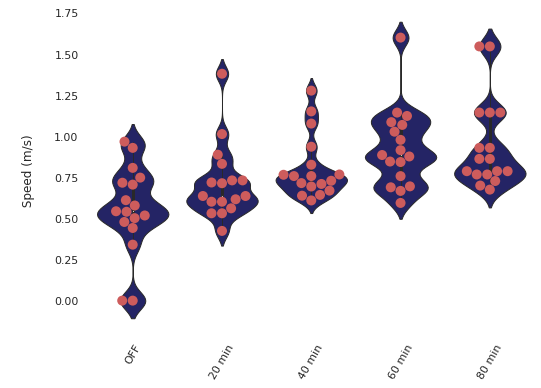

In [144]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Speed (m/s)", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Speed (m/s)", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Speed (m/s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [98]:
pg.friedman(data=output_wide, dv="Speed (m/s)", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.411765,4,28.0,0.000012


In [99]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Speed (m/s)", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.748952,0.210645,0.007046,0.001347
20min,0.748952,1.000000,0.130487,0.003557,0.000908
40min,0.210645,0.130487,1.000000,0.130487,0.032866
60min,0.007046,0.003557,0.130487,1.000000,0.506710
80min,0.001347,0.000908,0.032866,0.506710,1.000000


# Cadence

In [100]:
output_wide.groupby("Group").describe()["Cadence (steps/min)"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,112.471027,13.546155,89.133425,102.723735,109.300096,128.918322,132.757130
40min,17.0,112.188284,15.380522,83.594976,104.501845,107.006370,128.777613,137.593985
60min,17.0,116.102545,15.070675,98.467622,104.494380,109.230940,130.755712,146.280992
80min,17.0,113.486095,12.519532,102.335025,105.494506,106.715063,124.598270,138.888889
OFF,17.0,96.405151,40.380437,0.000000,92.621999,107.558528,114.268519,142.934004


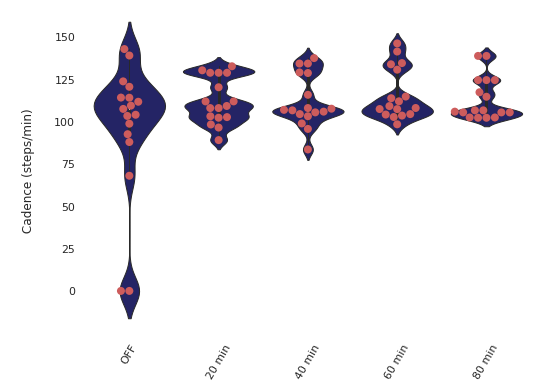

In [143]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Cadence (steps/min)", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Cadence (steps/min)", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Cadence (steps/min) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [105]:
pg.friedman(data=output_wide, dv="Cadence (steps/min)", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.035986,4,2.447059,0.65414


In [106]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Cadence (steps/min)", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,1.000000,1.000000,0.720097,1.000000
20min,1.000000,1.000000,1.000000,0.720097,1.000000
40min,1.000000,1.000000,1.000000,0.720097,1.000000
60min,0.720097,0.720097,0.720097,1.000000,0.720097
80min,1.000000,1.000000,1.000000,0.720097,1.000000


# STEP TIME

In [107]:
output_wide.groupby("Group").describe()["Step Time - worst side (s)2"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.552770,0.063067,0.442240,0.540217,0.564583,0.595686,0.665179
40min,17.0,0.541542,0.078237,0.422581,0.463232,0.558333,0.577500,0.713226
60min,17.0,0.527901,0.065150,0.412931,0.462121,0.552381,0.569615,0.616463
80min,17.0,0.541499,0.046577,0.433000,0.511304,0.556522,0.579545,0.601471
OFF,17.0,0.487194,0.204183,0.000000,0.474306,0.540385,0.567187,0.829060


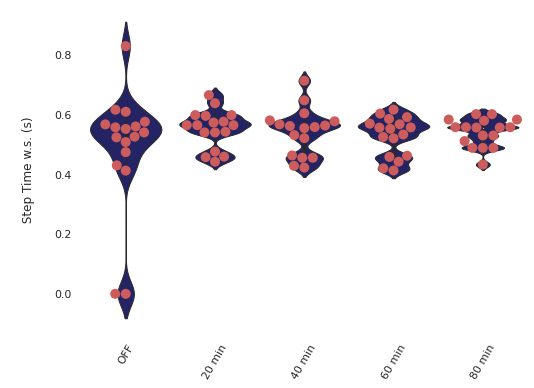

In [142]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Step Time - worst side (s)2", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Step Time - worst side (s)2", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Time w.s. (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [110]:
pg.friedman(data=output_wide, dv="Step Time - worst side (s)2", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.099654,4,6.776471,0.148183


In [111]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Step Time - worst side (s)2", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.291207,0.291207,0.660047,0.406422
20min,0.291207,1.000000,0.831019,0.376580,0.651484
40min,0.291207,0.831019,1.000000,0.406422,0.653308
60min,0.660047,0.376580,0.406422,1.000000,0.651484
80min,0.406422,0.651484,0.653308,0.651484,1.000000


# STEP LENGTH

In [112]:
output_wide.groupby("Group").describe()["Step Length - worst side (m)2"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.349335,0.106300,0.171850,0.253063,0.383195,0.393581,0.592672
40min,17.0,0.436831,0.070324,0.354631,0.387510,0.423095,0.465612,0.576598
60min,17.0,0.477164,0.097528,0.354176,0.403777,0.483714,0.559236,0.687235
80min,17.0,0.494994,0.100856,0.359173,0.423270,0.460102,0.576589,0.696317
OFF,17.0,0.286123,0.148352,0.000000,0.266526,0.337158,0.365236,0.480193


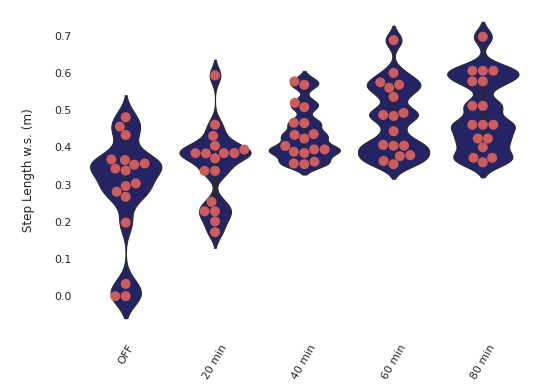

In [141]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Step Length - worst side (m)2", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Step Length - worst side (m)2", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Length w.s. (m) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [114]:
pg.friedman(data=output_wide, dv="Step Length - worst side (m)2", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.552941,4,37.6,1.354968e-07


In [115]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Step Length - worst side (m)2", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.831019,0.015652,0.000471,0.000303
20min,0.831019,1.000000,0.010431,0.000303,0.000294
40min,0.015652,0.010431,1.000000,0.254014,0.161392
60min,0.000471,0.000303,0.254014,1.000000,0.831019
80min,0.000303,0.000294,0.161392,0.831019,1.000000


# STRIDE TIME

In [116]:
output_wide.groupby("Group").describe()["Stride Time (s)"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,1.082707,0.126413,0.900862,1.029070,1.099375,1.163710,1.345833
40min,17.0,1.101249,0.139414,0.865094,1.026087,1.126905,1.166176,1.417460
60min,17.0,1.044839,0.119498,0.820982,0.920175,1.084400,1.126040,1.197222
80min,17.0,1.110081,0.098925,0.866176,1.052500,1.130680,1.183523,1.246642
OFF,17.0,0.990530,0.422596,0.000000,0.966250,1.074324,1.160833,1.729548


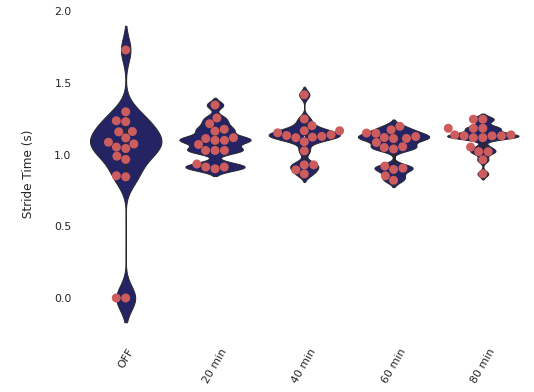

In [140]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Stride Time (s)", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Stride Time (s)", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 9, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stride Time (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [119]:
pg.friedman(data=output_wide, dv="Stride Time (s)", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.130104,4,8.847059,0.065038


In [120]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Stride Time (s)", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.188290,0.182682,0.915018,0.182682
20min,0.188290,1.000000,0.915018,0.182682,0.915018
40min,0.182682,0.915018,1.000000,0.182682,0.915018
60min,0.915018,0.182682,0.182682,1.000000,0.182682
80min,0.182682,0.915018,0.915018,0.182682,1.000000


# STRIDE TIME

In [121]:
output_wide.groupby("Group").describe()["Stride Length (m)"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.832778,0.161036,0.533705,0.752731,0.807116,0.907672,1.251527
40min,17.0,0.903446,0.118979,0.735208,0.824810,0.886820,0.911481,1.125196
60min,17.0,0.984343,0.148936,0.770667,0.846322,0.954127,1.057189,1.302005
80min,17.0,0.961108,0.164887,0.800632,0.825030,0.889629,0.991977,1.313033
OFF,17.0,0.602498,0.302551,0.000000,0.588038,0.650821,0.842926,1.019113


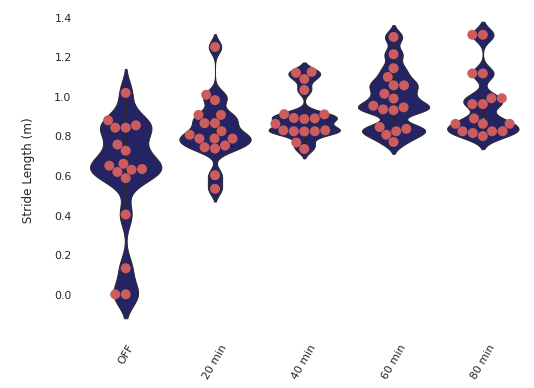

In [139]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Stride Length (m)", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Stride Length (m)", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stride Length (m) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [124]:
pg.friedman(data=output_wide, dv="Stride Length (m)", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.39654,4,26.964706,0.00002


In [125]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Stride Length (m)", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.423213,0.013038,0.000626,0.002710
20min,0.423213,1.000000,0.097069,0.004947,0.018783
40min,0.013038,0.097069,1.000000,0.240737,0.506710
60min,0.000626,0.004947,0.240737,1.000000,0.522646
80min,0.002710,0.018783,0.506710,0.522646,1.000000


# STEP WIDTH

In [126]:
output_wide.groupby("Group").describe()["Step Width (m)"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.181856,0.060714,0.097516,0.146270,0.185781,0.193246,0.352723
40min,17.0,0.183646,0.064524,0.117510,0.147697,0.164349,0.201659,0.402228
60min,17.0,0.174252,0.040640,0.130937,0.143974,0.162890,0.189884,0.255231
80min,17.0,0.202023,0.067069,0.133926,0.148040,0.191559,0.215259,0.325380
OFF,17.0,0.144499,0.069487,0.000000,0.119232,0.148787,0.184698,0.279079


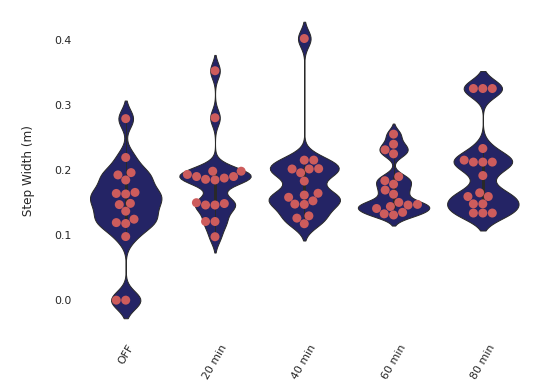

In [138]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Step Width (m)", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Step Width (m)", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 9, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Step Width (m) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [129]:
pg.friedman(data=output_wide, dv="Step Width (m)", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.050519,4,3.435294,0.487785


In [130]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Step Width (m)", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,1.000000,0.564284,0.564284,0.564284
20min,1.000000,1.000000,0.564284,0.564284,0.564284
40min,0.564284,0.564284,1.000000,1.000000,1.000000
60min,0.564284,0.564284,1.000000,1.000000,1.000000
80min,0.564284,0.564284,1.000000,1.000000,1.000000


# STANCE TIME

In [132]:
output_wide.groupby("Group").describe()["Stance Time - worst time t (s)2"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.747690,0.112819,0.580342,0.687255,0.751063,0.803321,0.961721
40min,17.0,0.742658,0.098942,0.562361,0.695699,0.766062,0.794331,0.959261
60min,17.0,0.690435,0.081776,0.519282,0.637540,0.704320,0.742547,0.798493
80min,17.0,0.711757,0.074902,0.549872,0.678491,0.744568,0.781358,0.793512
OFF,17.0,0.663686,0.270291,0.000000,0.662393,0.731670,0.799289,0.939427


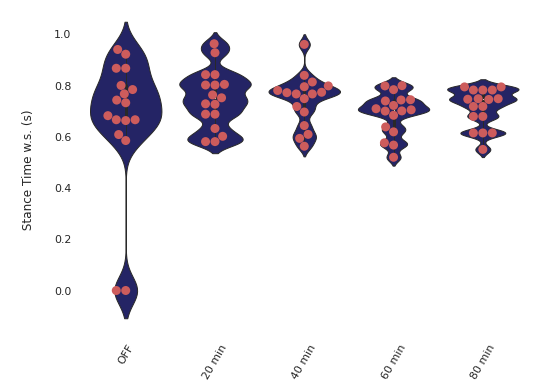

In [137]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Stance Time - worst time t (s)2", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Stance Time - worst time t (s)2", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 9, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Stance Time w.s. (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [134]:
pg.friedman(data=output_wide, dv="Stance Time - worst time t (s)2", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.213841,4,14.541176,0.005754


In [135]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Stance Time - worst time t (s)2", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.145604,0.225948,0.240737,0.660047
20min,0.145604,1.000000,0.748952,0.014841,0.240737
40min,0.225948,0.748952,1.000000,0.019233,0.360048
60min,0.240737,0.014841,0.019233,1.000000,0.145604
80min,0.660047,0.240737,0.360048,0.145604,1.000000


# SWING TIME

In [145]:
output_wide.groupby("Group").describe()["Swing Time - worst side (s)2"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.346283,0.038174,0.282100,0.320521,0.348312,0.374024,0.430602
40min,17.0,0.356955,0.043685,0.284851,0.335402,0.368739,0.372497,0.458199
60min,17.0,0.354404,0.046937,0.268410,0.329932,0.363088,0.380258,0.448333
80min,17.0,0.375885,0.033208,0.316305,0.350006,0.385210,0.390261,0.453130
OFF,17.0,0.325140,0.172071,0.000000,0.300732,0.344215,0.369844,0.808499


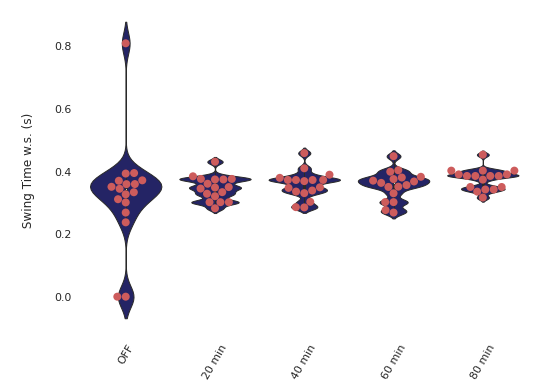

In [147]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Swing Time - worst side (s)2", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Swing Time - worst side (s)2", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Swing Time w.s. (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [148]:
pg.friedman(data=output_wide, dv="Swing Time - worst side (s)2", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.195848,4,13.317647,0.009824


In [149]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Swing Time - worst side (s)2", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.290301,0.182682,0.182682,0.007627
20min,0.290301,1.000000,0.660047,0.653308,0.139533
40min,0.182682,0.660047,1.000000,0.915018,0.182682
60min,0.182682,0.653308,0.915018,1.000000,0.188290
80min,0.007627,0.139533,0.182682,0.188290,1.000000


# DOUBLE SUPPORT TIME

In [150]:
output_wide.groupby("Group").describe()["Double Support Time (s)"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.403059,0.084353,0.248853,0.377001,0.378802,0.447062,0.575245
40min,17.0,0.376442,0.085873,0.223325,0.345180,0.384208,0.432958,0.568149
60min,17.0,0.339631,0.058499,0.224248,0.319704,0.327947,0.385320,0.426852
80min,17.0,0.344219,0.058653,0.226894,0.329227,0.344962,0.398482,0.410763
OFF,17.0,0.369945,0.173618,0.000000,0.342160,0.392701,0.443638,0.740414


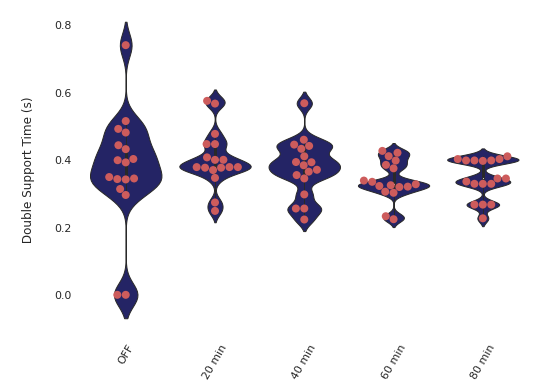

In [151]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Double Support Time (s)", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Double Support Time (s)", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Double Support Time (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [152]:
pg.friedman(data=output_wide, dv="Double Support Time (s)", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.157093,4,10.682353,0.030376


In [153]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Double Support Time (s)", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.280860,1.000000,0.228352,0.506710
20min,0.280860,1.000000,0.280860,0.028183,0.179737
40min,1.000000,0.280860,1.000000,0.228352,0.506710
60min,0.228352,0.028183,0.228352,1.000000,0.483672
80min,0.506710,0.179737,0.506710,0.483672,1.000000


# SINGLE SUPPORT TIME

In [154]:
output_wide.groupby("Group").describe()["Single Support Time - worst side"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.344843,0.039621,0.284620,0.323607,0.348825,0.372262,0.402930
40min,17.0,0.356265,0.027242,0.297700,0.340563,0.353963,0.378688,0.401730
60min,17.0,0.350803,0.041006,0.272973,0.314810,0.358009,0.376373,0.421683
80min,17.0,0.359794,0.045582,0.318804,0.333530,0.344899,0.396275,0.452131
OFF,17.0,0.295446,0.125164,0.000000,0.288400,0.339289,0.357015,0.434136


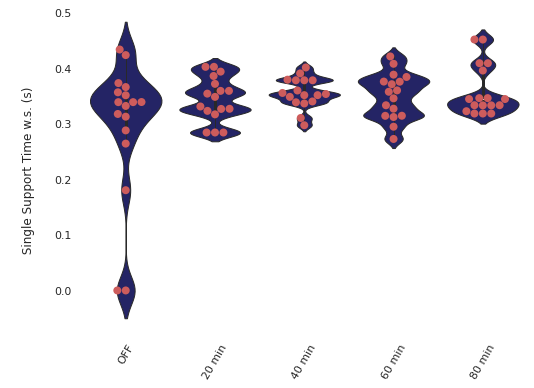

In [155]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Single Support Time - worst side", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Single Support Time - worst side", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Single Support Time w.s. (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [156]:
pg.friedman(data=output_wide, dv="Single Support Time - worst side", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.12872,4,8.752941,0.06758


In [157]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Single Support Time - worst side", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.346406,0.082165,0.346406,0.082165
20min,0.346406,1.000000,0.423213,1.000000,0.423213
40min,0.082165,0.423213,1.000000,0.423213,1.000000
60min,0.346406,1.000000,0.423213,1.000000,0.423213
80min,0.082165,0.423213,1.000000,0.423213,1.000000


# HIP FLEXION ROM

In [158]:
output_wide.groupby("Group").describe()["hip_flexion_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,31.198915,6.574062,13.99589,29.35357,30.45592,32.49984,45.66785
40min,17.0,34.936196,7.523931,21.47260,31.15246,32.66560,38.92847,51.41570
60min,17.0,36.379222,8.205458,22.32408,31.62208,37.15308,41.47141,54.14569
80min,17.0,32.796865,7.515475,22.19413,27.42727,31.88832,37.02598,50.70201
OFF,17.0,24.066268,11.662239,0.00000,18.66868,26.50311,31.83076,38.29841


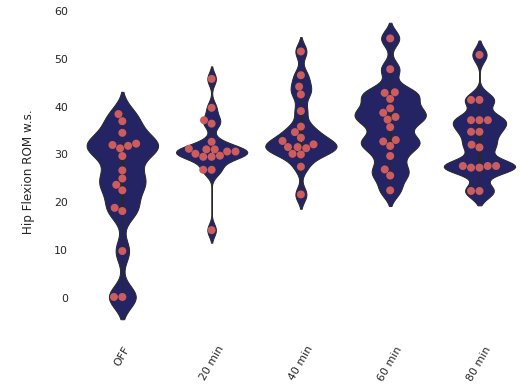

In [159]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_flexion_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_flexion_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Flexion ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [160]:
pg.friedman(data=output_wide, dv="hip_flexion_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.295502,4,20.094118,0.000478


In [161]:
sp.posthoc_conover_friedman(a=output_wide, y_col="hip_flexion_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.748952,0.041562,0.003831,0.116483
20min,0.748952,1.000000,0.069766,0.005335,0.161392
40min,0.041562,0.069766,1.000000,0.303712,0.580718
60min,0.003831,0.005335,0.303712,1.000000,0.122064
80min,0.116483,0.161392,0.580718,0.122064,1.000000


# HIP ADDUCTION ROM

In [162]:
output_wide.groupby("Group").describe()["hip_adduction_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,12.756781,4.200589,8.07683,8.85493,12.29690,14.08776,20.92012
40min,17.0,13.719332,5.138368,7.32875,11.87685,12.49124,14.14123,31.62434
60min,17.0,13.558573,3.083863,7.81598,12.23108,12.86548,14.49875,19.63433
80min,17.0,13.376686,1.348353,10.88223,12.05091,13.79198,14.40494,14.94694
OFF,17.0,8.593542,5.161535,0.00000,4.23758,10.43945,12.51567,18.04925


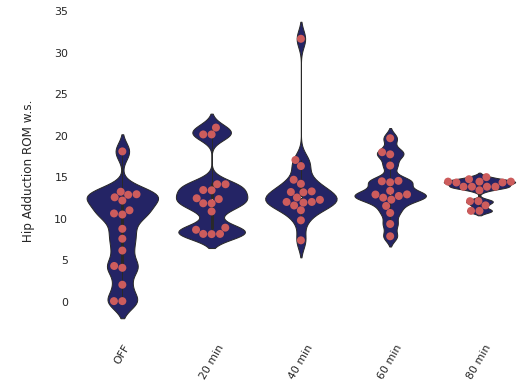

In [163]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_adduction_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_adduction_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Adduction ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [164]:
pg.friedman(data=output_wide, dv="hip_adduction_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.245675,4,16.705882,0.002205


In [165]:
sp.posthoc_conover_friedman(a=output_wide, y_col="hip_adduction_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.069766,0.041562,0.005335,0.005335
20min,0.069766,1.000000,0.832169,0.404949,0.404949
40min,0.041562,0.832169,1.000000,0.493252,0.483672
60min,0.005335,0.404949,0.493252,1.000000,0.915018
80min,0.005335,0.404949,0.483672,0.915018,1.000000


# HIP ROTATION ROM

In [166]:
output_wide.groupby("Group").describe()["hip_rotation_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,14.871255,4.240313,6.33887,13.03828,16.52311,17.05138,24.67782
40min,17.0,16.214771,4.221585,9.83608,12.57310,15.65542,17.86949,25.76239
60min,17.0,16.234466,4.083884,12.35812,13.22382,14.22330,19.42080,25.71655
80min,17.0,15.426085,4.154003,10.74889,12.52227,14.44464,15.19365,25.05258
OFF,17.0,10.004804,6.109658,0.00000,7.26582,9.88122,11.92574,25.70762


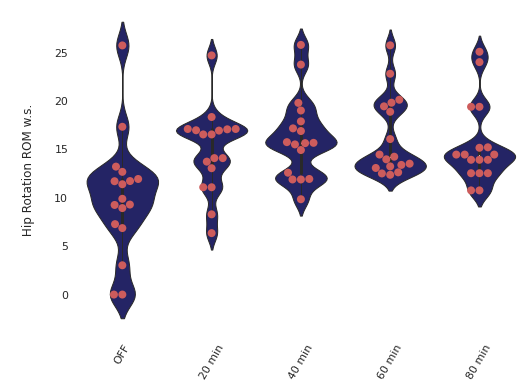

In [168]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_rotation_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_rotation_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Rotation ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [169]:
pg.friedman(data=output_wide, dv="hip_rotation_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.265744,4,18.070588,0.001196


In [170]:
sp.posthoc_conover_friedman(a=output_wide, y_col="hip_rotation_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.089868,0.005335,0.005335,0.006839
20min,0.089868,1.000000,0.337032,0.338685,0.411484
40min,0.005335,0.337032,1.000000,0.915018,0.915018
60min,0.005335,0.338685,0.915018,1.000000,0.915018
80min,0.006839,0.411484,0.915018,0.915018,1.000000


# KNEE ANGLE ROM

In [171]:
output_wide.groupby("Group").describe()["knee_angle_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,47.577981,10.448489,27.40669,40.35962,50.16179,53.50045,66.14621
40min,17.0,44.919495,13.609242,16.37864,36.43993,46.58351,55.09163,61.52853
60min,17.0,50.175495,12.973795,20.87714,41.65151,55.50462,60.73128,63.77186
80min,17.0,47.959535,10.138023,26.12331,43.82101,48.85172,51.71735,60.35939
OFF,17.0,40.843345,24.531870,0.00000,32.30334,39.98669,48.83999,108.81234


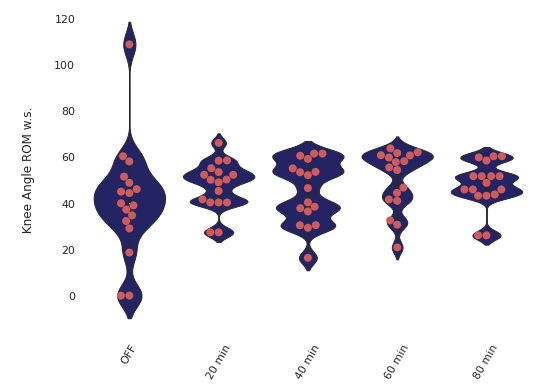

In [172]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="knee_angle_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "knee_angle_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Knee Angle ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [173]:
pg.friedman(data=output_wide, dv="knee_angle_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.107266,4,7.294118,0.121138


In [174]:
sp.posthoc_conover_friedman(a=output_wide, y_col="knee_angle_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.404949,0.366191,0.124685,0.404949
20min,0.404949,1.000000,0.744110,0.404949,0.831019
40min,0.366191,0.744110,1.000000,0.651484,0.653308
60min,0.124685,0.404949,0.651484,1.000000,0.404949
80min,0.404949,0.831019,0.653308,0.404949,1.000000


# ANKLE ANGLE ROM

In [175]:
output_wide.groupby("Group").describe()["ankle_angle_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,32.261811,5.929244,24.47453,27.18442,32.57011,34.52249,45.46935
40min,17.0,33.304493,11.451430,17.17096,26.98237,31.39729,40.37652,58.38137
60min,17.0,34.054422,9.222456,19.38941,29.06258,32.69118,38.32219,55.20476
80min,17.0,33.411019,9.429497,21.20842,25.83817,33.18135,37.58316,57.63206
OFF,17.0,24.234915,15.947120,0.00000,12.53706,24.13005,33.72439,56.61877


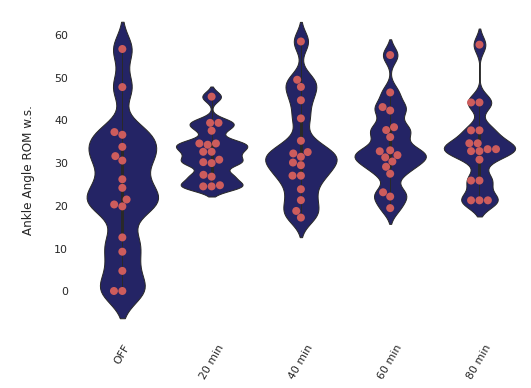

In [176]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="ankle_angle_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "ankle_angle_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Ankle Angle ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [177]:
pg.friedman(data=output_wide, dv="ankle_angle_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.111419,4,7.576471,0.108384


In [178]:
sp.posthoc_conover_friedman(a=output_wide, y_col="ankle_angle_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.153134,0.346406,0.153134,0.153134
20min,0.153134,1.000000,0.744110,0.744110,1.000000
40min,0.346406,0.744110,1.000000,0.677141,0.744110
60min,0.153134,0.744110,0.677141,1.000000,0.744110
80min,0.153134,1.000000,0.744110,0.744110,1.000000


# HIP FLEXION MEAN VELOCITY

In [179]:
output_wide.groupby("Group").describe()["hip_flexion_mean_vel_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,56.221140,15.046815,21.46385,52.67792,53.39661,54.31502,96.59356
40min,17.0,62.997701,18.638469,28.04771,55.40665,57.75936,70.69710,109.28297
60min,17.0,69.110775,20.450009,38.55026,57.61616,66.18973,82.12070,114.89547
80min,17.0,60.839989,15.739766,37.67996,53.02994,60.87802,61.47108,103.29797
OFF,17.0,44.765554,21.691863,0.00000,39.10316,49.93583,55.22371,77.01875


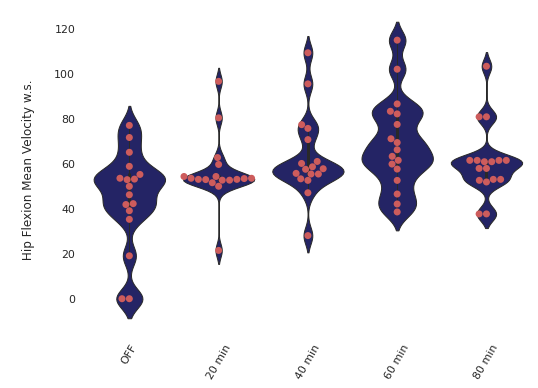

In [181]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_flexion_mean_vel_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_flexion_mean_vel_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 7, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Flexion Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [182]:
pg.friedman(data=output_wide, dv="hip_flexion_mean_vel_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.297578,4,20.235294,0.000449


In [183]:
sp.posthoc_conover_friedman(a=output_wide, y_col="hip_flexion_mean_vel_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.915018,0.104626,0.002710,0.114176
20min,0.915018,1.000000,0.104626,0.002693,0.104626
40min,0.104626,0.104626,1.000000,0.104626,0.915018
60min,0.002710,0.002693,0.104626,1.000000,0.104626
80min,0.114176,0.104626,0.915018,0.104626,1.000000


# HIP ADDUCTION MEAN VELOCITY

In [184]:
output_wide.groupby("Group").describe()["hip_adduction_mean_vel_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,24.367764,9.126337,12.93366,18.78558,22.10652,26.41620,45.44705
40min,17.0,26.950877,12.636398,13.32958,21.99478,24.46774,28.45553,73.29926
60min,17.0,27.708496,5.916302,18.34265,21.66362,29.06464,32.34645,36.98841
80min,17.0,28.755496,5.721937,18.48508,26.38192,29.06612,32.06376,35.80173
OFF,17.0,16.732552,10.054104,0.00000,8.11672,18.66962,22.77152,32.40617


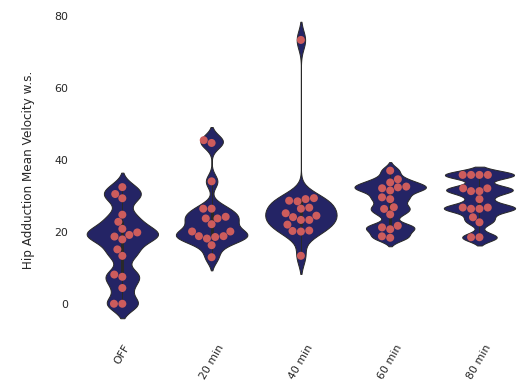

In [186]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_adduction_mean_vel_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_adduction_mean_vel_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Adduction Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [187]:
pg.friedman(data=output_wide, dv="hip_adduction_mean_vel_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.350865,4,23.858824,0.000085


In [188]:
sp.posthoc_conover_friedman(a=output_wide, y_col="hip_adduction_mean_vel_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.376189,0.071895,0.001311,0.003813
20min,0.376189,1.000000,0.303712,0.009394,0.031171
40min,0.071895,0.303712,1.000000,0.097069,0.240737
60min,0.001311,0.009394,0.097069,1.000000,0.594042
80min,0.003813,0.031171,0.240737,0.594042,1.000000


# HIP ROTATION MEAN VELOCITY

In [189]:
output_wide.groupby("Group").describe()["hip_rotation_mean_vel_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,30.094777,10.356515,10.56700,21.22638,30.25512,36.27083,55.80402
40min,17.0,33.490636,10.248035,15.59831,28.42089,35.05976,38.35236,52.63625
60min,17.0,34.830388,9.664594,22.91829,28.03433,33.09885,42.84827,55.43702
80min,17.0,34.664324,9.557505,23.25718,26.41293,34.33789,35.69125,51.60652
OFF,17.0,19.787260,9.566148,0.00000,15.55231,21.33507,25.70762,31.37413


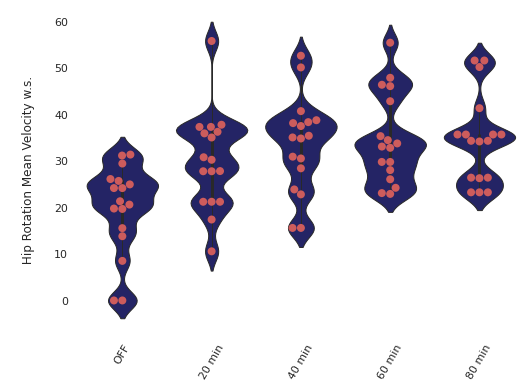

In [190]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="hip_rotation_mean_vel_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "hip_rotation_mean_vel_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Hip Rotation Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [191]:
pg.friedman(data=output_wide, dv="hip_rotation_mean_vel_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.345329,4,23.482353,0.000101


In [192]:
sp.posthoc_conover_friedman(a=output_wide, y_col="hip_rotation_mean_vel_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.053742,0.000942,0.000942,0.001807
20min,0.053742,1.000000,0.188290,0.188290,0.290301
40min,0.000942,0.188290,1.000000,1.000000,0.832169
60min,0.000942,0.188290,1.000000,1.000000,0.832169
80min,0.001807,0.290301,0.832169,0.832169,1.000000


# KNEE ANGLE MEAN VELOCITY

In [193]:
output_wide.groupby("Group").describe()["knee_angle_r_mean_vel_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,102.189500,25.232888,46.68505,90.98674,101.16819,109.71497,158.81783
40min,17.0,89.756472,31.360584,30.68501,59.85104,94.76367,104.25829,149.97986
60min,17.0,111.021610,33.302200,55.81027,81.85905,120.24488,129.96993,169.90147
80min,17.0,101.258342,27.211468,57.82245,86.31118,87.27336,115.15020,165.76289
OFF,17.0,79.294195,38.726204,0.00000,64.25969,91.49572,98.35177,140.27909


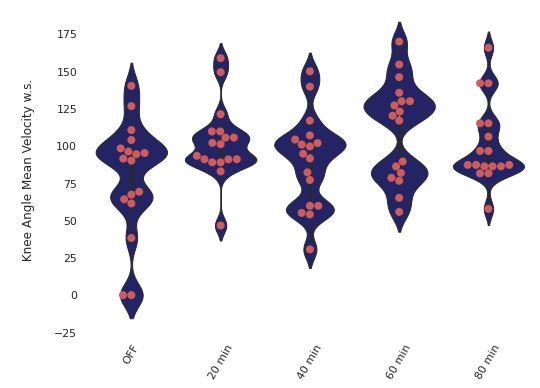

In [194]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="knee_angle_r_mean_vel_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "knee_angle_r_mean_vel_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Knee Angle Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [195]:
pg.friedman(data=output_wide, dv="knee_angle_r_mean_vel_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.119723,4,8.141176,0.086541


In [196]:
sp.posthoc_conover_friedman(a=output_wide, y_col="knee_angle_r_mean_vel_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.915018,0.915018,0.119824,0.912078
20min,0.915018,1.000000,0.915018,0.119824,0.915018
40min,0.915018,0.915018,1.000000,0.119824,0.915018
60min,0.119824,0.119824,0.119824,1.000000,0.228352
80min,0.912078,0.915018,0.915018,0.228352,1.000000


# ANKLE ANGLE MEAN VELOCITY

In [197]:
output_wide.groupby("Group").describe()["ankle_angle_mean_vel_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,62.045204,15.161608,44.22766,51.20735,60.27396,67.56117,107.14350
40min,17.0,66.463828,21.994441,32.79336,50.48858,67.53289,72.86082,130.84393
60min,17.0,69.087709,17.233647,32.71881,60.48819,65.67492,80.63915,93.66885
80min,17.0,71.876529,19.967623,37.21204,58.44232,70.71977,82.34404,101.02349
OFF,17.0,48.866160,28.430923,0.00000,37.50243,41.53261,69.05600,100.84929


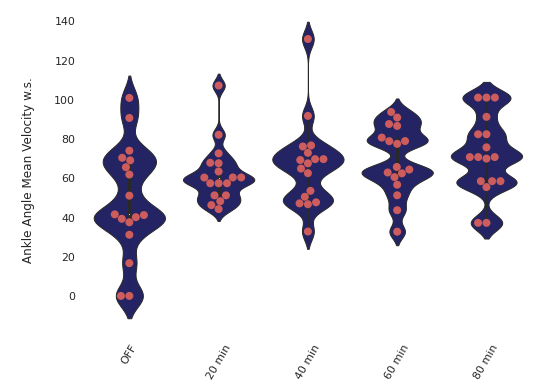

In [198]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="ankle_angle_mean_vel_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "ankle_angle_mean_vel_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Ankle Angle Mean Velocity w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [199]:
pg.friedman(data=output_wide, dv="ankle_angle_mean_vel_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.171626,4,11.670588,0.019977


In [200]:
sp.posthoc_conover_friedman(a=output_wide, y_col="ankle_angle_mean_vel_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.438446,0.182682,0.046957,0.046957
20min,0.438446,1.000000,0.438446,0.182682,0.182682
40min,0.182682,0.438446,1.000000,0.438446,0.438446
60min,0.046957,0.182682,0.438446,1.000000,0.915018
80min,0.046957,0.182682,0.438446,0.915018,1.000000


# ARM FLEXION ROM

In [201]:
output_wide.groupby("Group").describe()["arm_flex_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,13.833925,11.760907,5.81862,6.95495,7.60247,14.28338,49.21045
40min,17.0,20.982901,12.145842,4.56564,9.89745,18.40447,28.44157,51.64180
60min,17.0,22.567373,14.067674,7.74607,9.97149,20.19564,25.46909,57.80835
80min,17.0,28.712516,14.956116,7.85814,14.72198,31.68682,40.43195,52.65485
OFF,17.0,6.625785,5.372112,0.00000,3.31923,6.74897,7.91269,19.81346


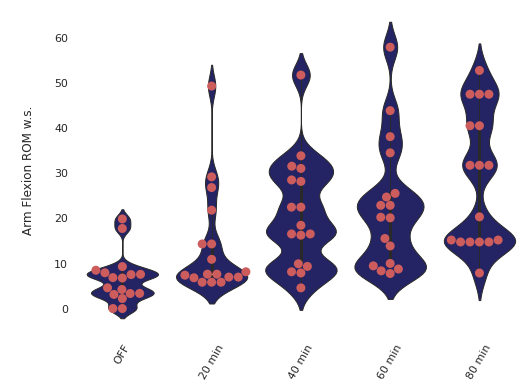

In [205]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="arm_flex_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "arm_flex_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 9, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Flexion ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [206]:
pg.friedman(data=output_wide, dv="arm_flex_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.561938,4,38.211765,1.013314e-07


In [207]:
sp.posthoc_conover_friedman(a=output_wide, y_col="arm_flex_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.320043,0.002134,0.000147,0.000062
20min,0.320043,1.000000,0.035828,0.002134,0.000898
40min,0.002134,0.035828,1.000000,0.320043,0.197947
60min,0.000147,0.002134,0.320043,1.000000,0.669699
80min,0.000062,0.000898,0.197947,0.669699,1.000000


# ARM ADDUCTION ROM

In [208]:
output_wide.groupby("Group").describe()["arm_add_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,8.675721,3.507012,3.92840,5.93228,7.603680,9.97951,17.28591
40min,17.0,9.874755,4.168091,4.25502,6.41333,9.594570,12.26767,18.03380
60min,17.0,11.565831,7.396676,3.66542,7.60959,8.256280,15.85665,31.82069
80min,17.0,12.337464,5.753618,2.69853,9.19927,11.336990,16.13255,21.61685
OFF,17.0,4.186611,2.329045,0.00000,2.88543,4.744826,4.93879,7.95686


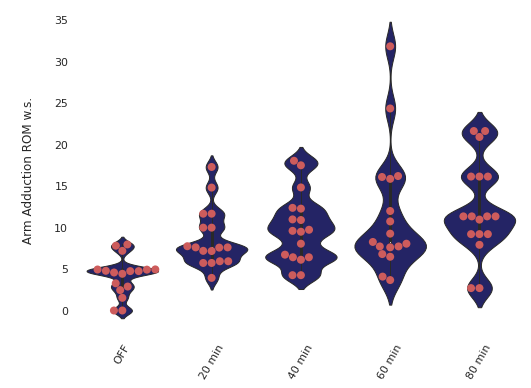

In [210]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="arm_add_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "arm_add_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Adduction ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [211]:
pg.friedman(data=output_wide, dv="arm_add_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.291349,4,19.811765,0.000544


In [212]:
sp.posthoc_conover_friedman(a=output_wide, y_col="arm_add_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.023410,0.023478,0.010258,0.000908
20min,0.023410,1.000000,0.915018,0.744110,0.280860
40min,0.023478,0.915018,1.000000,0.742553,0.277125
60min,0.010258,0.744110,0.742553,1.000000,0.483672
80min,0.000908,0.280860,0.277125,0.483672,1.000000


# ELBOW FLEXION ROM

In [213]:
output_wide.groupby("Group").describe()["elbow_flex_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,13.211274,7.022719,5.30572,7.91118,10.55952,15.88318,25.01547
40min,17.0,16.325452,8.774976,4.06075,10.37840,15.53827,22.07672,35.86799
60min,17.0,17.397764,8.315529,6.79998,12.59905,17.22038,20.17370,42.38516
80min,17.0,30.494237,29.499738,8.00401,10.83399,17.08865,28.54475,89.92559
OFF,17.0,7.002533,5.678069,0.00000,4.40809,5.71361,7.89672,21.06254


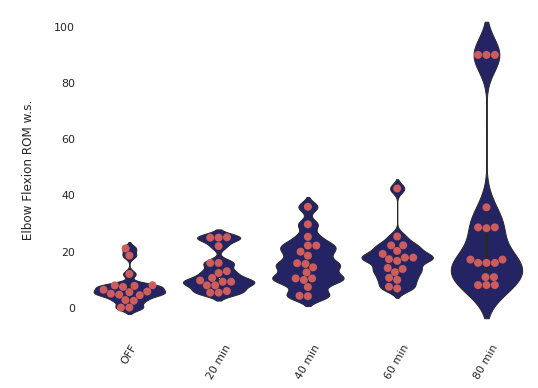

In [217]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="elbow_flex_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "elbow_flex_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Elbow Flexion ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [215]:
pg.friedman(data=output_wide, dv="elbow_flex_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.365398,4,24.847059,0.000054


In [216]:
sp.posthoc_conover_friedman(a=output_wide, y_col="elbow_flex_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.225790,0.009617,0.009617,0.000294
20min,0.225790,1.000000,0.152235,0.152235,0.009617
40min,0.009617,0.152235,1.000000,1.000000,0.173203
60min,0.009617,0.152235,1.000000,1.000000,0.173203
80min,0.000294,0.009617,0.173203,0.173203,1.000000


# ARM ROTATION ROM

In [218]:
output_wide.groupby("Group").describe()["arm_rot_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,12.559754,10.472742,3.63332,5.48363,8.96286,13.75993,37.57370
40min,17.0,20.682824,12.201345,5.38421,9.38600,19.93456,24.58371,48.40181
60min,17.0,18.384711,12.316849,5.49176,11.43380,13.75788,22.98376,47.52845
80min,17.0,23.009655,10.095063,5.99270,16.03221,20.09981,35.08224,35.92550
OFF,17.0,7.335340,6.198391,0.00000,3.32861,4.75163,10.56374,22.18472


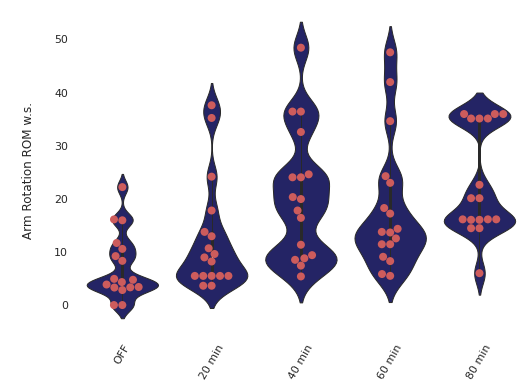

In [219]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="arm_rot_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "arm_rot_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Rotation ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [220]:
pg.friedman(data=output_wide, dv="arm_rot_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.451211,4,30.682353,0.000004


In [221]:
sp.posthoc_conover_friedman(a=output_wide, y_col="arm_rot_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.161392,0.000454,0.002542,0.000200
20min,0.161392,1.000000,0.024937,0.097069,0.009617
40min,0.000454,0.024937,1.000000,0.580718,0.669699
60min,0.002542,0.097069,0.580718,1.000000,0.360048
80min,0.000200,0.009617,0.669699,0.360048,1.000000


# PRONATION SUPINATION ROM

In [222]:
output_wide.groupby("Group").describe()["pro_sup_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,15.627921,8.964337,5.95353,10.00998,13.50357,16.09130,35.91667
40min,17.0,18.991879,11.992904,7.72345,11.61156,14.33889,21.70036,49.43738
60min,17.0,20.638822,11.227411,8.48010,14.15663,16.22943,21.72638,45.33272
80min,17.0,24.058181,12.629930,8.98922,12.87488,23.23492,33.85885,53.62630
OFF,17.0,6.469085,4.339451,0.00000,4.17770,7.15709,8.96433,13.81358


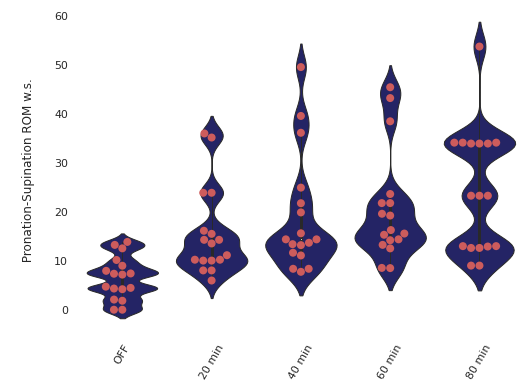

In [223]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="pro_sup_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "pro_sup_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Pronation-Supination ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [224]:
pg.friedman(data=output_wide, dv="pro_sup_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.39654,4,26.964706,0.00002


In [225]:
sp.posthoc_conover_friedman(a=output_wide, y_col="pro_sup_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.069766,0.001277,0.000430,0.000655
20min,0.069766,1.000000,0.197947,0.071895,0.122064
40min,0.001277,0.197947,1.000000,0.653308,0.748952
60min,0.000430,0.071895,0.653308,1.000000,0.748952
80min,0.000655,0.122064,0.748952,0.748952,1.000000


# WRIST FLEXION ROM




In [226]:
output_wide.groupby("Group").describe()["wrist_flex_rom_worstside"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,13.505610,6.901626,4.66739,6.96824,14.35837,17.11430,25.02487
40min,17.0,16.219165,12.184661,4.92770,6.92211,13.84784,21.32904,49.83102
60min,17.0,20.237582,13.905082,4.58036,7.12906,17.98990,29.75440,46.05653
80min,17.0,27.870950,21.227065,6.62884,10.85267,15.66192,38.44387,60.46665
OFF,17.0,5.587428,3.558433,0.00000,3.24984,5.15160,8.23172,11.98388


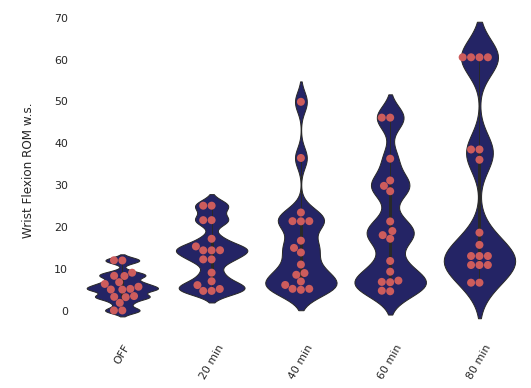

In [227]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="wrist_flex_rom_worstside", data=output_wide, color="midnightblue", linewidth = 1, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "wrist_flex_rom_worstside", x = "Group", data = output_wide, color="indianred", edgecolor = "indianred", size = 8, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Wrist Flexion ROM w.s. \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [228]:
pg.friedman(data=output_wide, dv="wrist_flex_rom_worstside", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.413149,4,28.094118,0.000012


In [229]:
sp.posthoc_conover_friedman(a=output_wide, y_col="wrist_flex_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.041083,0.041083,0.000655,0.000092
20min,0.041083,1.000000,0.915018,0.173203,0.046511
40min,0.041083,0.915018,1.000000,0.161392,0.042993
60min,0.000655,0.173203,0.161392,1.000000,0.506710
80min,0.000092,0.046511,0.042993,0.506710,1.000000




---

**APPENDIX: Inputing using K-Nearest Neighbors**

*Exploratory, won't be employed*


---





In [ ]:
# LevodopaChallengeAllTimePoints = pd.read_csv('LevodopaChallengeAllTimePoints.csv', sep = ';')

In [ ]:
# Remove patient index
#patid_LevodopaChallengeAllTimePoints = LevodopaChallengeAllTimePoints.iloc[:,0:1]



# Remove condition label
#condition_LevodopaChallengeAllTimePoints = LevodopaChallengeAllTimePoints.iloc[:,57:58]

# LevodopaChallengeAllTimePoints = LevodopaChallengeAllTimePoints.iloc[:,1:57]

# imputer = KNNImputer(n_neighbors=3)

# imputed = imputer.fit_transform(LevodopaChallengeAllTimePoints)

# imputed

# df_imputed = pd.DataFrame(imputed, columns=LevodopaChallengeAllTimePoints.columns)

# df_imputed

# df_imputed = pd.concat([patid_LevodopaChallengeAllTimePoints, df_imputed], axis = 1)

# df_imputed = pd.concat([df_imputed, condition_LevodopaChallengeAllTimePoints], axis = 1)

# df_imputed

# df_imputed.to_csv('output_knn.csv', encoding = 'utf-8-sig') 
# files.download('output_knn.csv')